# Project : A multivariate linear regression model for predicting diabetes


### Table of Contents 


### 1. Data Preparation


### 2. Correlation Analysis


### 3. Model Development Without Feature Selection


### 4. Model Development With Feature Selection

### 5. Results
Developed a multivariate linear regression model that can predict diabetes disease with an accuracy of 87 %

In [29]:
#Importing Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error as mse
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score


import warnings
warnings.filterwarnings('ignore')

## LOAD DIABETES DATA

In [30]:
#load diabetis data
diabetis_data = pd.read_excel("Diabetes_Data.xlsx")
diabetis_data

,AGE,SEX,BMI,BP,S1,S2,S3,S4,S5,S6,Y
0,59,2,32.1,101.00,157,93.2,38.0,4.00,4.8598,87,151
1,48,1,21.6,87.00,183,103.2,70.0,3.00,3.8918,69,75
2,72,2,30.5,93.00,156,93.6,41.0,4.00,4.6728,85,141
3,24,1,25.3,84.00,198,131.4,40.0,5.00,4.8903,89,206
4,50,1,23.0,101.00,192,125.4,52.0,4.00,4.2905,80,135
...,...,...,...,...,...,...,...,...,...,...,...
437,60,2,28.2,112.00,185,113.8,42.0,4.00,4.9836,93,178
438,47,2,24.9,75.00,225,166.0,42.0,5.00,4.4427,102,104
439,60,2,24.9,99.67,162,106.6,43.0,3.77,4.1271,95,132
440,36,1,30.0,95.00,201,125.2,42.0,4.79,5.1299,85,220


## CORRELATION ANALYSIS

In [31]:
#correlation coefficient
diabetis_corr = diabetis_data.corr()
diabetis_corr

,AGE,SEX,BMI,BP,S1,S2,S3,S4,S5,S6,Y
AGE,1.000000,0.173737,0.185085,0.335428,0.260061,0.219243,-0.075181,0.203841,0.270774,0.301731,0.187889
SEX,0.173737,1.000000,0.088161,0.241010,0.035277,0.142637,-0.379090,0.332115,0.149916,0.208133,0.043062
BMI,0.185085,0.088161,1.000000,0.395411,0.249777,0.261170,-0.366811,0.413807,0.446157,0.388680,0.586450
BP,0.335428,0.241010,0.395411,1.000000,0.242464,0.185548,-0.178762,0.257650,0.393480,0.390430,0.441482
S1,0.260061,0.035277,0.249777,0.242464,1.000000,0.896663,0.051519,0.542207,0.515503,0.325717,0.212022
S2,0.219243,0.142637,0.261170,0.185548,0.896663,1.000000,-0.196455,0.659817,0.318357,0.290600,0.174054
S3,-0.075181,-0.379090,-0.366811,-0.178762,0.051519,-0.196455,1.000000,-0.738493,-0.398577,-0.273697,-0.394789
S4,0.203841,0.332115,0.413807,0.257650,0.542207,0.659817,-0.738493,1.000000,0.617859,0.417212,0.430453
S5,0.270774,0.149916,0.446157,0.393480,0.515503,0.318357,-0.398577,0.617859,1.000000,0.464669,0.565883
S6,0.301731,0.208133,0.388680,0.390430,0.325717,0.290600,-0.273697,0.417212,0.464669,1.000000,0.382483


<AxesSubplot:>

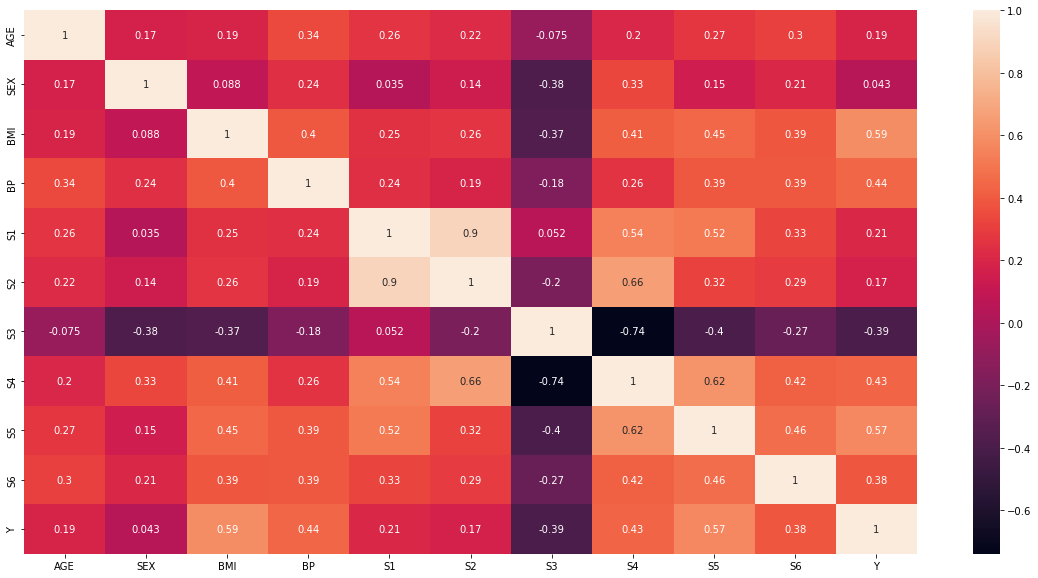

In [32]:
#Heatmap of correlation matrix
plt.figure(figsize=(20,10))
sn.heatmap(diabetis_corr, annot = True)

# MODEL DEVELOPMENT WITHOUT FEATURE SELECTION

In [33]:
#Multivariate linear regression model
X = diabetis_data.iloc[:,:-1]
y = diabetis_data.iloc[:,-1]

X_new = sm.add_constant(X)

model1 = sm.OLS(y, X_new).fit()

#view model summary
print(model1.summary())

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.518
Model:                            OLS   Adj. R-squared:                  0.507
Method:                 Least Squares   F-statistic:                     46.27
Date:                Sun, 21 Apr 2024   Prob (F-statistic):           3.83e-62
Time:                        11:31:02   Log-Likelihood:                -2386.0
No. Observations:                 442   AIC:                             4794.
Df Residuals:                     431   BIC:                             4839.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -334.5671     67.455     -4.960      0.0

# MODEL DEVELOPMENT WITH FEATURE SELECTION

In [34]:
#Stepwise approach to selecting significant variables for building multivariate linear regression model
def forward_regression(X, y,
                       threshold_in,
                       verbose=True):
    initial_list = []
    included = list(initial_list)
    while True:
        changed=False
        excluded = list(set(X.columns)-set(included))
        new_pval = pd.Series(index=excluded)
        for new_column in excluded:
            model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included+[new_column]]))).fit()
            new_pval[new_column] = model.pvalues[new_column]
        best_pval = new_pval.min()
        if best_pval < threshold_in:
            best_feature = new_pval.idxmin()
            included.append(best_feature)
            changed=True
            if verbose:
                print('Add  {:30} with p-value {:.6}'.format(best_feature, best_pval))

        if not changed:
            break

    return included
selected_col=forward_regression(X,y,0.05)
print(selected_col)

Add  BMI                            with p-value 3.46601e-42
Add  S5                             with p-value 3.03963e-20
Add  BP                             with p-value 3.74262e-05
Add  S1                             with p-value 0.00145443
Add  SEX                            with p-value 0.00923056
Add  S2                             with p-value 0.000272302
['BMI', 'S5', 'BP', 'S1', 'SEX', 'S2']


In [35]:
#use selected features to develop model again

X_selected = diabetis_data[['BMI','S5','BP','S1','SEX','S2']]


model2 = sm.OLS(y, X_selected).fit()

#view model summary
print(model2.summary())

                                 OLS Regression Results                                
Dep. Variable:                      Y   R-squared (uncentered):                   0.866
Model:                            OLS   Adj. R-squared (uncentered):              0.864
Method:                 Least Squares   F-statistic:                              470.9
Date:                Sun, 21 Apr 2024   Prob (F-statistic):                   5.61e-187
Time:                        11:31:03   Log-Likelihood:                         -2453.8
No. Observations:                 442   AIC:                                      4920.
Df Residuals:                     436   BIC:                                      4944.
Df Model:                           6                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------